# Домашнее задание №5
## Линейная регрессия и метод наименьших квадратов
### выполнила Щеглова Полина, СКБ172

#### Краткое теоритическое введение:
Имеются результаты серии экспериментальных измерений $(x_1, y_1), (x_2, y_2), . . . , (x_n, y_n)$, причем обе величины x и y измерены в одних и тех же экспериментах; известно, что ошибки измерений величины $y$ – независимые нормально распределенные случайные величины с одинаковыми дисперсиями и нулевыми математическими ожиданиями, величина $x$ измерена с пренебрежимо малой
ошибкой (т.е. $x$ – неслучайная величина).

Необходимо восстановить линейную регрессионную зависимость по результатам измерений.

Задача линейного регрессионного анализа состоит в восстановлении функциональной зависимости $y (x) = a_0 + a_1 x$ по результатам измерений$(x_1, y_1), (x_2, y_2), . . . , (x_n, y_n)$.

Уравнение (эмпирическая регрессия) $\hat{y} =\hat{a_0}+\hat{a_1} x$, определяет прямую линию, которая является оценкой истинной линии регрессии.

Необходимо вычислить оценки $\hat{a_0}, \hat{a_1}$ для параметров $a_0, a_1$ по результатам эксперимента и проверить значимость полученного уравнения регрессии.

В данной работе проводится исследование на наличие зависимости стоимости дома в США от населения, проживающего на соответствующей территории. Если рассуждать обывательски легко сказать: чем выше плотность населения в месте, где вы хотите купить дом/квартиру, тем дороже это вам обойдется. Пример с ценами на жилье в Москве никого не оставляет сомневающимся. Однако предлагается убедиться, насколько эти две величины зависимы друг от друга. Если действительно, чем выше плотность население, тем дороже жилье, то зависимость будет линейной.

В таком случае уместным будет воспользоваться методом регрессионного анализа.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
r = (open('dataset.csv', 'r', encoding='utf-8').read()).replace('\n', ';').split(';')
r = r[2:-1]
df['Население'] =list(map(float, r[::2]))
df['Стоимость'] =list(map(float, r[1::2]))
df

,Население,Стоимость
0,23086.800503,1.059034e+06
1,40173.072174,1.505891e+06
2,36882.159400,1.058988e+06
3,34310.242831,1.260617e+06
4,26354.109472,6.309435e+05
5,26748.428425,1.068138e+06
6,60828.249085,1.502056e+06
7,36516.358972,1.573937e+06
8,29387.396003,7.988695e+05
9,40149.965749,1.545155e+06


Рассчитаем коэффициент корреляции Пирсона по формуле:
$$ r_{x y} =\dfrac{\sum_{i=1}^m (x_i-\bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^m (x_i-\bar{x})^2\sum_{i=1}^m (y_i-\bar{y})^2}} = \dfrac{cov(x,y)}{\sqrt{s_x^2 s_y^2}}$$

In [27]:
def r_xy(x_arr, y_arr):
    xmean=np.mean(x_arr)
    ymean=np.mean(y_arr)
    s1 = np.sum(list(map(lambda i:(x_arr[i]-xmean)*(y_arr[i]-ymean), np.arange(1,len(x_arr)))))
    s2 = (np.sum(list(map(lambda i:(i-xmean)**2, x_arr)))*np.sum(list(map(lambda i:(i-ymean)**2, y_arr))))**(1/2)
    return s1/s2
r_xy(np.array(df['Население']),np.array(df['Стоимость']))

0.4082514960365056

Попробуем воспользоваться методом линейной регрессии, несмотря на небольшой коэффициент корреляции Пирсона, и проверим, насколько большим будет отклонение.
Воспользуемся встроенной функцией нахождения минимума функции:

In [48]:
from scipy.optimize import fminbound

def E(a0, a1, x_arr, y_arr):
    return np.sum(list(map(lambda i:(a0+a1*x_arr[i]-y_arr[i])**2, np.arange(1,len(x_arr)))))

def w1(a0):
    return E(a0, 1, np.array(df['Население']),np.array(df['Стоимость']))
a0_ = fminbound(w1, -10*5, 10*5)
print(f"a0: {a0_}")

def w2(a1):
    return E(a0_, a1, np.array(df['Население']),np.array(df['Стоимость']))
a1_ = fminbound(w2, -10*5, 10*5)
print(f"a1: {a1_}")

a0: 49.99999215811929
a1: 32.73125662842812


$\hat{y} = \hat{a_0} +\hat{a_1}\cdot x$
Проверим найденные оценки параметров $a_0, a_1$ - сравним оценку $\hat{y}$ с эмпирическим значением $y$:

In [47]:
df1 = pd.DataFrame()
df1['Реальное значение']=df['Стоимость']
df1['Оценка']=a0_+a1_*df['Население']
df1['Отклонение'] = abs(df1['Реальное значение'] - df1['Оценка'])
df1

,Реальное значение,Оценка,Отклонение
0,1.059034e+06,7.557100e+05,303323.565895
1,1.505891e+06,1.314965e+06,190925.779987
2,1.058988e+06,1.207249e+06,148261.436438
3,1.260617e+06,1.123067e+06,137549.443555
4,6.309435e+05,8.626531e+05,231709.630999
5,1.068138e+06,8.755597e+05,192578.399226
6,1.502056e+06,1.991035e+06,488979.213690
7,1.573937e+06,1.195276e+06,378660.247821
8,7.988695e+05,9.619364e+05,163066.867368
9,1.545155e+06,1.314209e+06,230945.980090


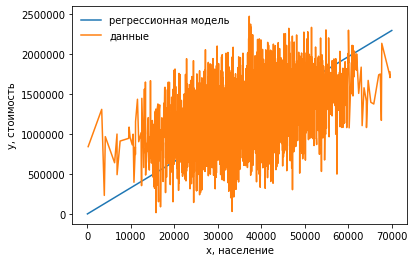

In [74]:
x = np.linspace(0,70000)
fig, ax = plt.subplots(1,1)
ax.plot(x, a0_+a1_*x,  label="регрессионная модель")
(df.sort_values('Население'))['Стоимость']
ax.plot((df.sort_values('Население'))['Население'], (df.sort_values('Население'))['Стоимость'],  label="данные")
plt.xlabel('x, население')
plt.ylabel('y, стоимость')
ax.legend(loc='best', frameon=False)
plt.show()

Как видно из сравнения оценочных значений и реальных, линейное приближение дало оценку с точностью до порядка, что можно объяснить большими значениями и небольшим коэффициентом корреляции Пирсона $\approx 0.4 < 0.7$. Построив график, видим, что величина действительно мало коррелированная и линейной зависимости между населением территории и стоимостью жилья не наблюдается.

Ссылка на источник данных: https://www.kaggle.com/ayushverma209039/usa-housing-linear-regression/data